In [ ]:
#Import all libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Inline matplotlib to view inside this notebook directly
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/heart (3).csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.shape

(1025, 14)

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

<Axes: >

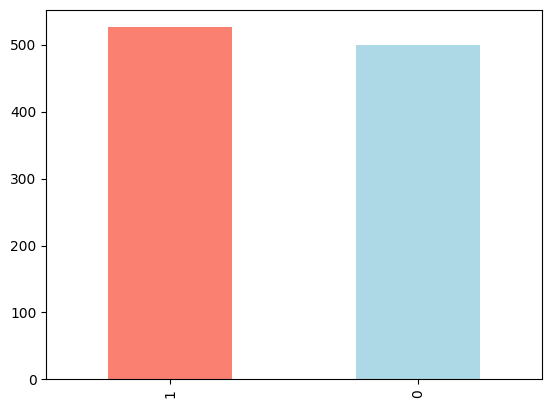

In [ ]:
df["target"].value_counts().plot(kind='bar', color=["salmon","lightblue"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#Compare target and sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


(14.5, -0.5)

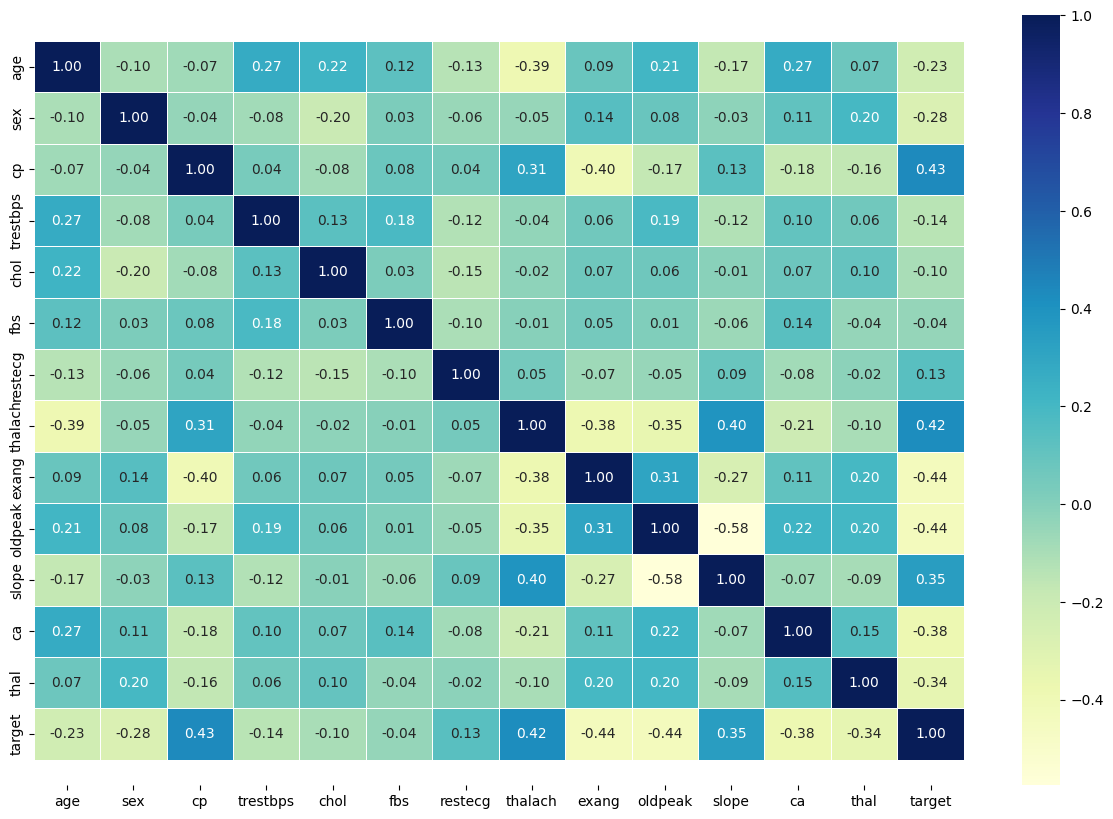

In [ ]:
#Visualise correlation
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top-0.5)

In [ ]:
#Split data into X and y for training features and target variable
X=df.drop("target",axis=1)
y=df["target"]

In [ ]:
#Split data into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

LOGISTIC REGRESSION

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Testing Accuracy for Logistic Regression: 0.8048780487804879
Testing Sensitivity for Logistic Regression: 0.8522727272727273
Testing Specificity for Logistic Regression: 0.7692307692307693
Testing Precision for Logistic Regression: 0.7352941176470589


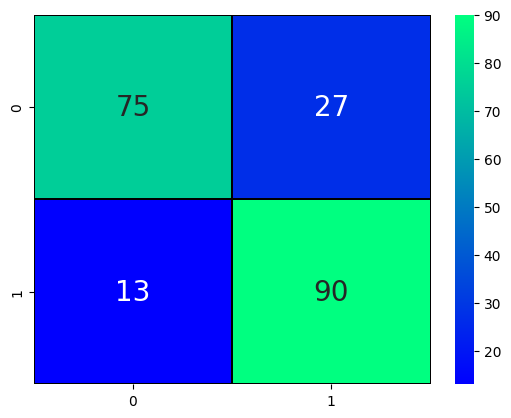

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction1)
cm
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))
score = model1.score(X_test, y_test)
score_logreg = score

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79       102
           1       0.77      0.87      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



              precision    recall  f1-score   support

           0       0.96      0.84      0.90       102
           1       0.86      0.96      0.91       103

    accuracy                           0.90       205
   macro avg       0.91      0.90      0.90       205
weighted avg       0.91      0.90      0.90       205

Testing Accuracy for Decision Tree: 0.9024390243902439
Testing Sensitivity for Decision Tree: 0.9555555555555556
Testing Specificity for Decision Tree: 0.8608695652173913
Testing Precision for Decision Tree: 0.8431372549019608


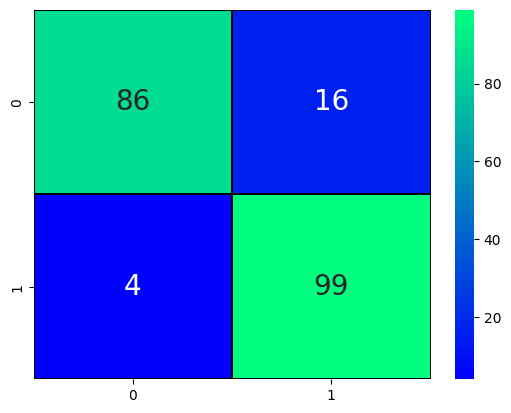

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
cv_scores = cross_val_score(tree_model, X, y, cv=10, scoring='accuracy')
m=tree_model.fit(X, y)
prediction=m.predict(X_test)
cm= confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(y_test, prediction))

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))
score = tree_model.score(X_test, y_test)
score_dtc = score

[Text(0, 0, 'Logistic Regression'), Text(0, 1, 'Decision Tree')]

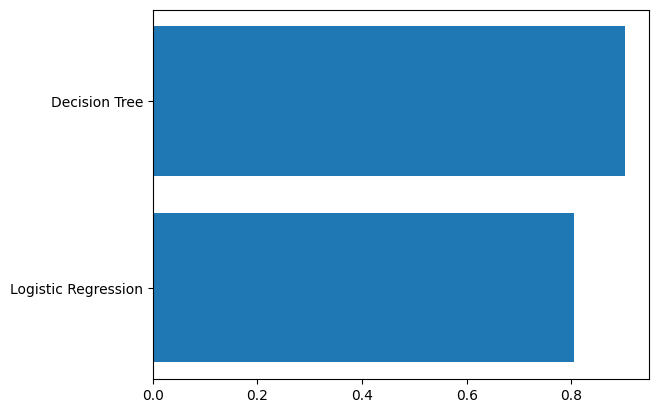

In [ ]:
fig,ax = plt.subplots()
algorithms = ('Logistic Regression', 'Decision Tree')
x = (score_logreg, score_dtc)
y_pos = np.arange(len(algorithms))
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(algorithms)

In [ ]:
input=(72,1,0,135,225,130,1,170,0,3,2,0,1)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=tree_model.predict(input_reshaped)
if(pre1==1):
  print("The patient seems to be have heart disease:(")
else:
  print("The patient seems to be Normal:)")

The patient seems to be have heart disease:(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Testing Accuracy for Logistic Regression: 0.7365853658536585


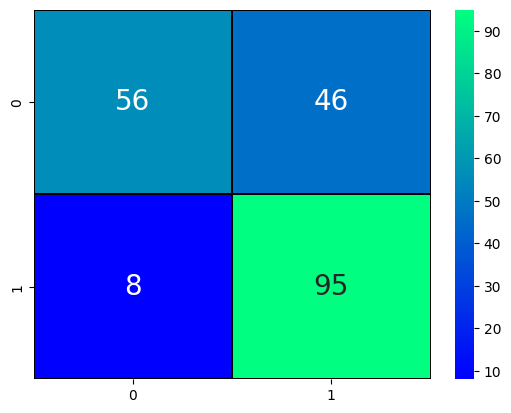

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1.0,  dual=True,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction1)
cm
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
score = model1.score(X_test, y_test)
score_logreg = score